In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import plotly.express as px
from plotly.express import histogram
from plotly.express import scatter_geo

In [2]:
df=pd.read_csv("GroceryDataset.csv")


df



,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...
...,...,...,...,...,...,...,...,...
1752,Snacks,$23.99,No Discount,NaN,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,Cocktail Pepperoni Smoked Sausage Sticks 3...,Cocktail PepperoniSmoked Sausage Sticks3 oz ba...
1753,Snacks,$49.99,No Discount,NaN,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,Made with Real Cheese,64-count2.1 oz Bags
1754,Snacks,$22.99,No Discount,NaN,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,Chile & Limón Mix Variety Pack 30 ct Net...,8-Doritos Dinamita Chile Limón Flavored Rolled...
1755,Snacks,$17.49,No Discount,NaN,"Fruit Roll-Ups, Variety Pack, 72-count",$,Variety Pack 1 Box with 72 Rolls Flavore...,Fruit Flavored Snacks\nVariety Includes: Straw...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sub Category         1757 non-null   object
 1   Price                1754 non-null   object
 2   Discount             1757 non-null   object
 3   Rating               682 non-null    object
 4   Title                1757 non-null   object
 5   Currency             1752 non-null   object
 6   Feature              1739 non-null   object
 7   Product Description  1715 non-null   object
dtypes: object(8)
memory usage: 109.9+ KB


In [4]:
df.describe()

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
count,1757,1754,1757,682,1757,1752,1739,1715
unique,19,184,42,483,1484,1,1401,1435
top,Snacks,$14.99,No Discount,No Reviews,"Ziploc Seal Top Freezer Bag, Gallon, 38-count,...",$,Pick Your Arrival Date at Checkout Gift Mess...,Item may be available in your local warehouse ...
freq,293,81,1626,61,4,1752,7,5


In [5]:
missing_values=df.isnull().sum()
missing_values

Sub Category              0
Price                     3
Discount                  0
Rating                 1075
Title                     0
Currency                  5
Feature                  18
Product Description      42
dtype: int64

In [6]:
cols_with_null=[col for col in df.columns
                if df[col].isnull().any()]
cols_with_null

['Price', 'Rating', 'Currency', 'Feature', 'Product Description']

In [7]:
rows_with_null=df[df.isnull().any(axis=1)]
rows_with_null

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
34,Beverages & Water,$27.99,No Discount,NaN,"Prime Hydration+ Sticks Electrolyte Drink Mix,...",$,Activate with Water No Added Sugar Antioxi...,Hydration+ Sticks Electrolyte Drink Mix\nVarie...
35,Beverages & Water,$21.99,No Discount,NaN,"Prime Hydration Drink, Variety Pack, 16.9 fl o...",$,5 - Tropical Punch 5 - Lemon Lime 5 - Blue...,Limit 5 per member Gluten free\n​Caffeine fr...
36,Beverages & Water,$20.99,After $5 OFF,NaN,"Alani Nu Energy Drink, Variety Pack, 12 fl oz,...",$,6 - Juicy Peach 6 - Cosmic Stardust 6 - Ch...,Zero sugar\n200mg caffeine
37,Beverages & Water,$19.99,After $5 OFF,NaN,"Poppi Prebiotic Soda, Variety Pack, 12 fl oz, ...",$,5 - Doc Pop 5 - Grape 5 - Root Beer 12 f...,Prebiotics for a healthy gut\n5g sugar or less...
38,Beverages & Water,$19.99,After $5 OFF,NaN,"Poppi Prebiotic Soda, Variety Pack, 12 fl oz, ...",$,5 - Strawberry Lemon 5 - Orange 5 - Cherry...,Prebiotics for a healthy gut\n5g sugar or less...
...,...,...,...,...,...,...,...,...
1752,Snacks,$23.99,No Discount,NaN,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,Cocktail Pepperoni Smoked Sausage Sticks 3...,Cocktail PepperoniSmoked Sausage Sticks3 oz ba...
1753,Snacks,$49.99,No Discount,NaN,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,Made with Real Cheese,64-count2.1 oz Bags
1754,Snacks,$22.99,No Discount,NaN,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,Chile & Limón Mix Variety Pack 30 ct Net...,8-Doritos Dinamita Chile Limón Flavored Rolled...
1755,Snacks,$17.49,No Discount,NaN,"Fruit Roll-Ups, Variety Pack, 72-count",$,Variety Pack 1 Box with 72 Rolls Flavore...,Fruit Flavored Snacks\nVariety Includes: Straw...


In [8]:
df.nunique()

Sub Category             19
Price                   184
Discount                 42
Rating                  483
Title                  1484
Currency                  1
Feature                1401
Product Description    1435
dtype: int64

In [9]:
df.head(10)

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...
5,Bakery & Desserts,$59.99,No Discount,Rated 4.4 out of 5 stars based on 369 reviews.,David's Cookies Mango & Strawberry Cheesecake ...,$,2-count\nStrawberry Cheesecake\nMango Cheeseca...,Strawberry Cheesecake: There's only one way to...
6,Bakery & Desserts,$74.99,No Discount,Rated 4.7 out of 5 stars based on 2241 reviews.,"La Grande Galette French Butter Cookies, 1.3 l...",$,"1.3 lb, 6-count\nBaked in, and Imported from, ...",Once upon a time in the French coastal town of...
7,Bakery & Desserts,$59.99,No Discount,Rated 4.4 out of 5 stars based on 232 reviews.,David's Cookies No Sugar Added Cheesecake & Ma...,$,2-count\nNo Sugar Added\nKosher OU-Dairy,Creamy Dreamy:This smooth creamy cheesecake ha...
8,Bakery & Desserts,$29.99,No Discount,Rated 4.4 out of 5 stars based on 1679 reviews.,David's Cookies Brownie and Cookie Combo Pack,$,6 Rocky Road Brownies\n12 Chocoloate Chunk Coo...,Due to the perishable nature of this product o...
9,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 2 reviews.,"The Cake Bake Shop 8"" Round Chocolate Cake (16...",$,3 Layers of French Valrhona Chocolate Cake M...,"Due to the perishable nature of this item, ord..."


In [10]:
df.tail(10)

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
1747,Snacks,$23.99,No Discount,NaN,"Oberto Thin Style Beef Jerky, Original, 1.2 oz...",$,97% Fat Free No Added MSG 0g Trans Fat per...,Original Beef JerkyThin style1.2 oz bag8-count
1748,Snacks,$49.99,No Discount,No Reviews,"Honey Mama's Classic Variety Truffle Bars, 2.5...",$,12-pack (2 flavors) 3 Servings per bar Dai...,Founded by Christy Goldsby in 2013 at the Port...
1749,Snacks,$49.99,No Discount,No Reviews,"Honey Mama's Greatest Hits Truffle Bars, 2.5 o...",$,12-pack (6 flavors) 3 servings per bar Dai...,Founded by Christy Goldsby in 2013 at the Port...
1750,Snacks,$49.99,No Discount,No Reviews,"Honey Mama's Cocoa Truffle Bars, 2.5 oz, 12-ct",$,"12-pack 3 Servings per bar Dairy, Gluten a...",Founded by Christy Goldsby in 2013 at the Port...
1751,Snacks,$10.99,No Discount,NaN,"El Camino Real Bakery Dulce De Leche Delights,...",$,Dulce De Leche Delights 0g Trans Fat per Ser...,A Delectable Butter Pastry with Filling
1752,Snacks,$23.99,No Discount,NaN,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,Cocktail Pepperoni Smoked Sausage Sticks 3...,Cocktail PepperoniSmoked Sausage Sticks3 oz ba...
1753,Snacks,$49.99,No Discount,NaN,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,Made with Real Cheese,64-count2.1 oz Bags
1754,Snacks,$22.99,No Discount,NaN,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,Chile & Limón Mix Variety Pack 30 ct Net...,8-Doritos Dinamita Chile Limón Flavored Rolled...
1755,Snacks,$17.49,No Discount,NaN,"Fruit Roll-Ups, Variety Pack, 72-count",$,Variety Pack 1 Box with 72 Rolls Flavore...,Fruit Flavored Snacks\nVariety Includes: Straw...
1756,Snacks,$21.99,No Discount,NaN,"Takis, Rolled Tortilla Chips, Intense Nacho, 1...",$,"Intense Nacho Cheese Non-Spicy 1 oz bag, 5...",Takis Non-Spicy Cheese Tortilla Chips\nIndivid...


In [11]:
df["Discount"]

0       No Discount
1       No Discount
2       No Discount
3       No Discount
4       No Discount
           ...     
1752    No Discount
1753    No Discount
1754    No Discount
1755    No Discount
1756    No Discount
Name: Discount, Length: 1757, dtype: object

In [12]:
count_dis=df["Discount"].sum()

for column in ["Sub Category","Price","Discount","Product Description","Sub Category"]:
    histogram(data_frame=df,x=column).show()

In [13]:
fig=px.histogram(df,x="Currency",
                width=300,
                height=450)
fig.update_layout(font=dict(size=8))
fig.show()

In [14]:


fig=px.histogram(df,x="Price",
                width=300,
                height=450)
fig.update_layout(font=dict(size=14))
fig.show()



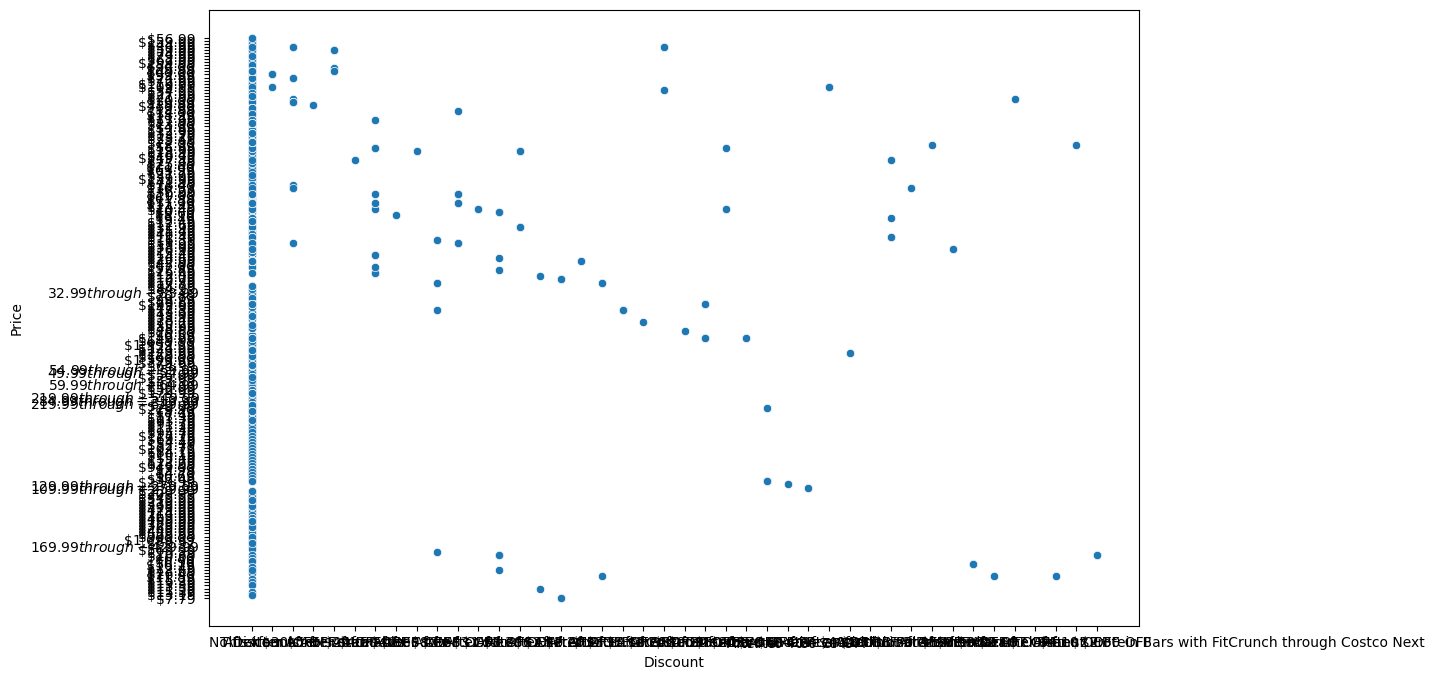

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x="Discount",y="Price")
plt.xlabel("Discount")
plt.ylabel("Price")
plt.show()

In [16]:
fig = px.box(df, y='Discount', color_discrete_sequence=['lightcoral'])
fig.update_layout(
    title='Box Plot of Discount',
    yaxis_title='Discount'
)
fig.show()

In [17]:
fig= px.line(df['Price'].value_counts().sort_index(), markers=True)
fig